# Project: Investigate TMDB movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,866 movies collected from The Movie Database, including popularity, budget, revenue, title, genres, user ratings, etc.

In this project, I am going to  answer the following questions by investigating the dataset:

* **Q1:** Which genres are most popular from decade to decade?
* **Q2:** What kinds of properties are associated with movies that have high revenues?
* **Q3:** What kinds of properties are associated with movies that have high ratings?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format='retina'

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Assessing

In [2]:
# Load the TMDB move data
movies = pd.read_csv('tmdb-movies.csv')
movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
# # of rows and columns
movies.shape

(10866, 21)

In [4]:
# # of duplicated rows
movies.duplicated().sum()

1

In [5]:
# dataset overview
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# # of missing values of each attribute
movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# # of unique values of each attribute
movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
# Summary statistics
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Select Columns for further Analysis

Attributes that are relevant in answering the aforementioned questions are selected for analysis. Attributes such as id, imdb_id, homepage, etc. are not informative in this context.

In [9]:
# Attributes to be kept
columns = ['original_title', 'runtime', 'genres', 'release_year', 'popularity', 'vote_average', 
           'budget_adj', 'revenue_adj']
movies = movies[columns]
movies.head(1)

,original_title,runtime,genres,release_year,popularity,vote_average,budget_adj,revenue_adj
0,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,32.985763,6.5,1.379999e+08,1.392446e+09


### Rename Columns

Rename some of the attributes to make it more self-explanatory.

In [10]:
movies.rename(columns={'original_title': 'movie',
                       'genres': 'genre',
                       'vote_average': 'rating',
                       'budget_adj': 'budget',
                       'revenue_adj': 'revenue'}, inplace=True)
movies.head(1)

,movie,runtime,genre,release_year,popularity,rating,budget,revenue
0,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,32.985763,6.5,1.379999e+08,1.392446e+09


### Drop Rows with Missing Values

Since there are more than 10,000 samples in this dataset, plus, values in budget and revenue attributes are missing (0 is not in the normal range of these attributes), it is safe to drop rows with missing values in genre attribute.

In [11]:
movies.isnull().sum()

movie            0
runtime          0
genre           23
release_year     0
popularity       0
rating           0
budget           0
revenue          0
dtype: int64

In [12]:
movies[movies.genre.isnull()]

,movie,runtime,genre,release_year,popularity,rating,budget,revenue
424,Belli di papÃ,100,NaN,2015,0.244648,6.1,0.00000,0.0
620,All Hallows' Eve 2,90,NaN,2015,0.129696,5.0,0.00000,0.0
997,Star Wars Rebels: Spark of Rebellion,44,NaN,2014,0.330431,6.8,0.00000,0.0
1712,Prayers for Bobby,88,NaN,2009,0.302095,7.4,0.00000,0.0
1897,Jonas Brothers: The Concert Experience,76,NaN,2009,0.020701,7.0,0.00000,0.0
2370,Freshman Father,0,NaN,2010,0.081892,5.8,0.00000,0.0
2376,Doctor Who: A Christmas Carol,62,NaN,2010,0.068411,7.7,0.00000,0.0
2853,Vizontele,110,NaN,2001,0.130018,7.2,0.00000,0.0
3279,ì•„ê¸°ì™€ ë‚˜,96,NaN,2008,0.145331,6.1,0.00000,0.0
4547,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,2012,0.520520,8.3,0.00000,0.0


In [13]:
movies.dropna(axis=0, inplace=True)
movies.isnull().sum().any()

False

### Dedupe Data

In [14]:
movies.duplicated().sum()

1

In [15]:
movies.drop_duplicates(inplace=True)
movies.duplicated().sum()

0

### Feature Engineering

#### Engineer Decade
In order to find out popularities of genres from decade to decade, movie release years are binned into decades.

In [16]:
movies.release_year.value_counts()

2014    699
2013    656
2015    627
2012    584
2011    540
2009    531
2008    495
2010    487
2007    438
2006    408
2005    363
2004    307
2003    281
2002    266
2001    241
2000    226
1999    224
1998    210
1996    203
1997    192
1994    184
1993    178
1995    174
1988    145
1989    136
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1976     47
1974     46
1966     46
1975     44
1964     42
1970     40
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

In [17]:
# Bin release years into decades
movies['release_by_decade'] = pd.cut(x=movies['release_year'], 
                                         bins=[1950, 1970, 1980, 1990, 2000, 2010, 2020],
                                         labels = ['1960s', '1970s', '1980s', 
                                                   '1990s', '2000s', '2010s'])

In [18]:
movies.release_by_decade.value_counts()

2000s    3817
2010s    3106
1990s    1857
1980s    1116
1970s     544
1960s     402
Name: release_by_decade, dtype: int64

#### Engineer Genres

The original column genre contains a combination of genres which are undesirable for calculcating statics. Thus, one-encoding of genre is applied to every sample.

In [19]:
# Extract categories of genre
genres = []
for g in movies.genre:
    genres.extend(g.split("|"))

In [20]:
genres = list(set(genres))
genres

['Fantasy',
 'Crime',
 'Mystery',
 'Science Fiction',
 'Family',
 'War',
 'Foreign',
 'Thriller',
 'Horror',
 'Adventure',
 'Romance',
 'Documentary',
 'Drama',
 'Animation',
 'Action',
 'TV Movie',
 'History',
 'Comedy',
 'Music',
 'Western']

In [21]:
len(genres)

20

In [22]:
def split_genres(genres):
    if genres.find(g) > -1:
        return 1
    else:
        return 0

In [23]:
# One-hot encode the categories of genre
for g in genres:
    movies[g.strip().lower().replace(' ', '_')] = movies['genre'].apply(split_genres)

In [24]:
movies.loc[0]

movie                                           Jurassic World
runtime                                                    124
genre                Action|Adventure|Science Fiction|Thriller
release_year                                              2015
popularity                                             32.9858
rating                                                     6.5
budget                                                1.38e+08
revenue                                            1.39245e+09
release_by_decade                                        2010s
fantasy                                                      0
crime                                                        0
mystery                                                      0
science_fiction                                              1
family                                                       0
war                                                          0
foreign                                                

In [25]:
movies.drop('genre', axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which genres are most popular from decade to decade?

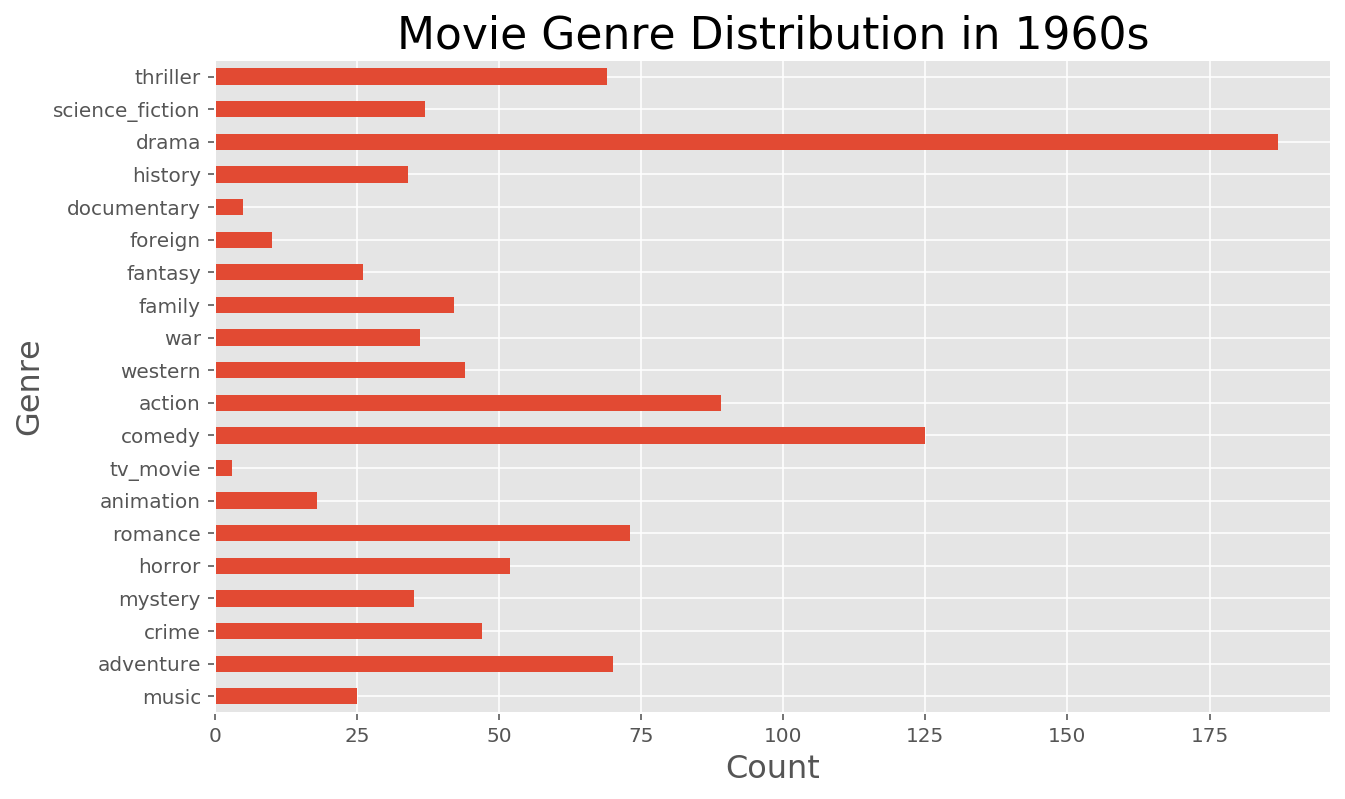

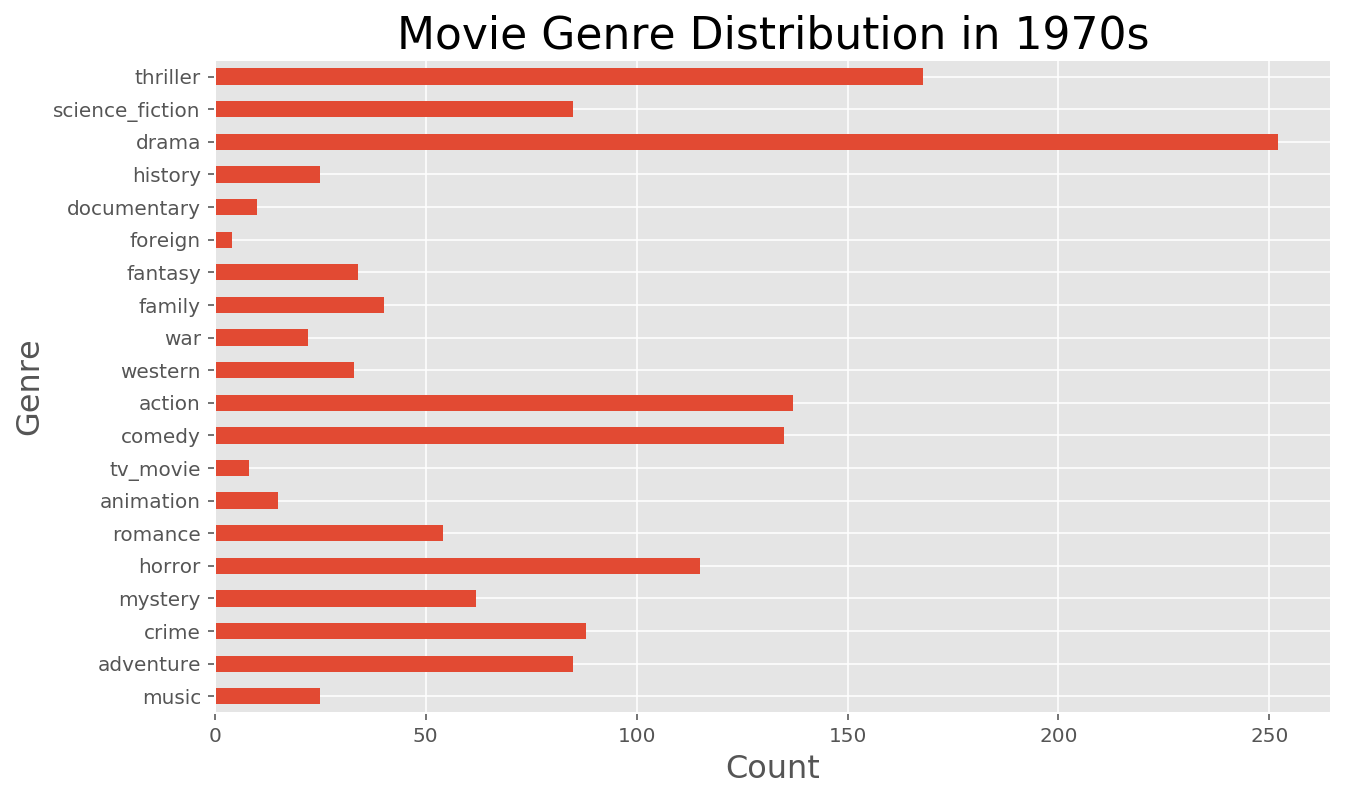

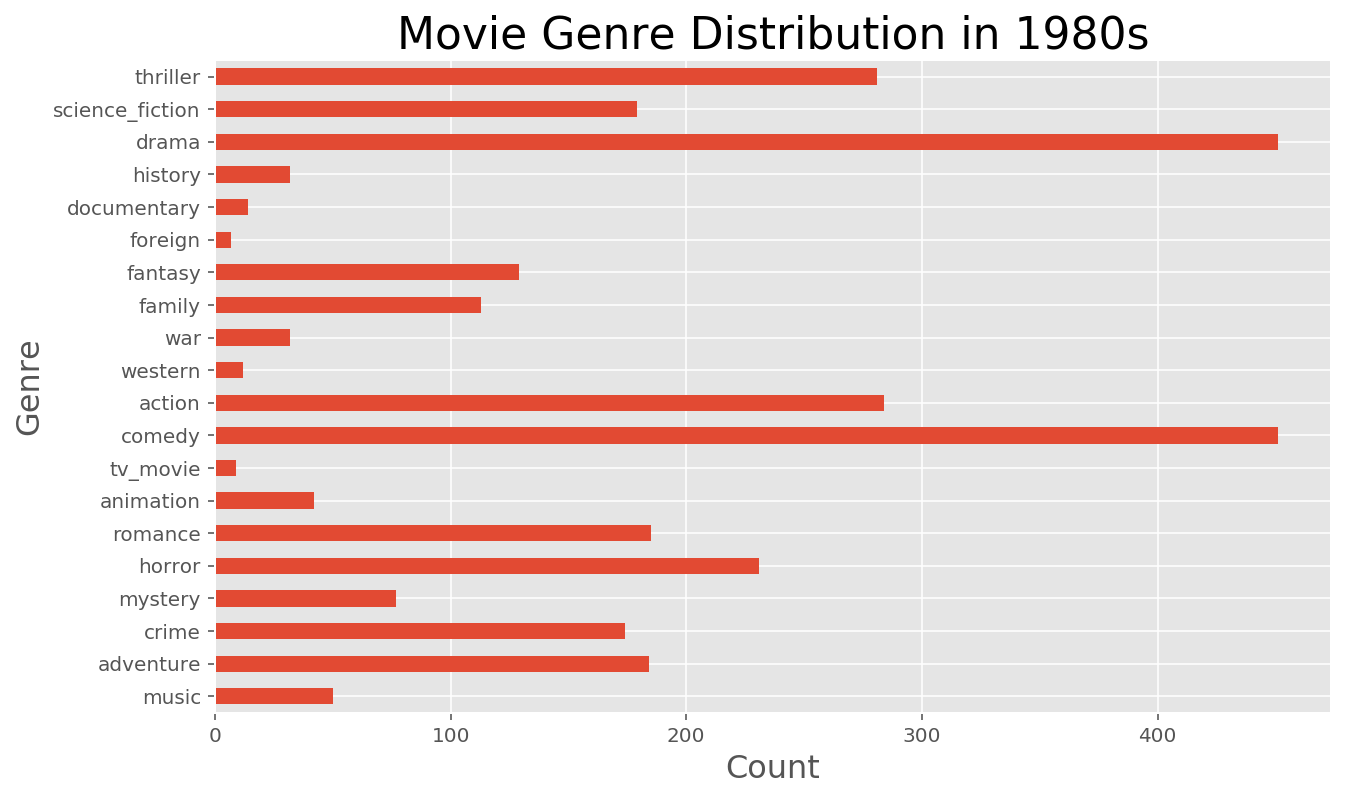

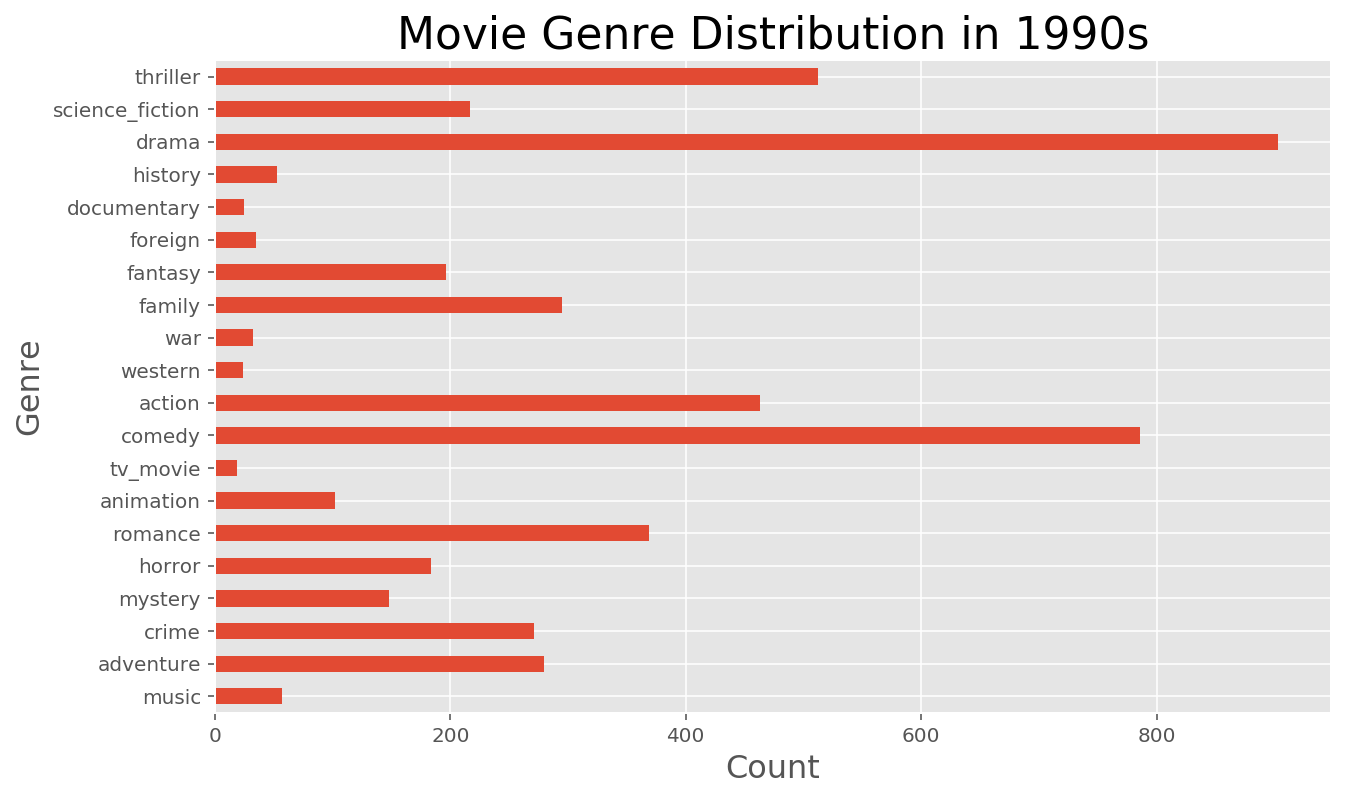

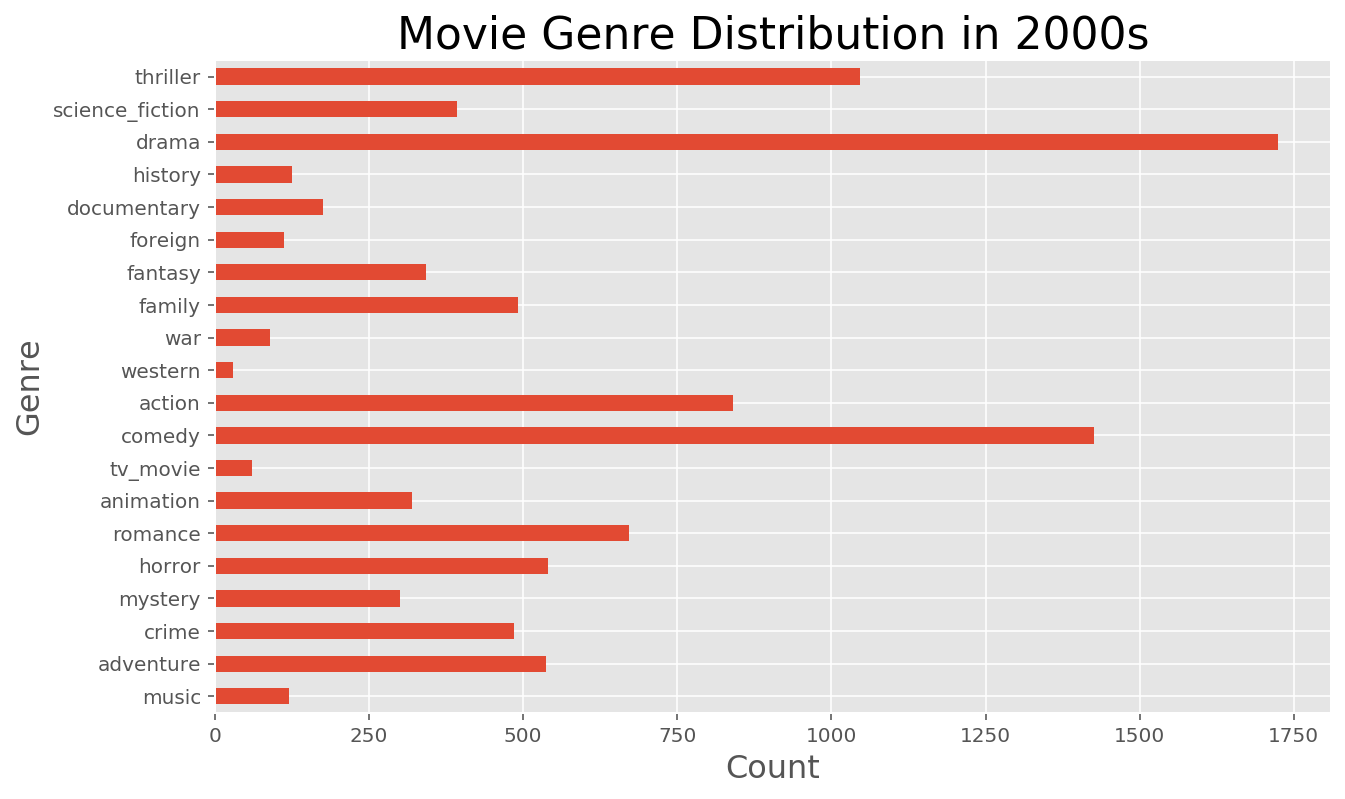

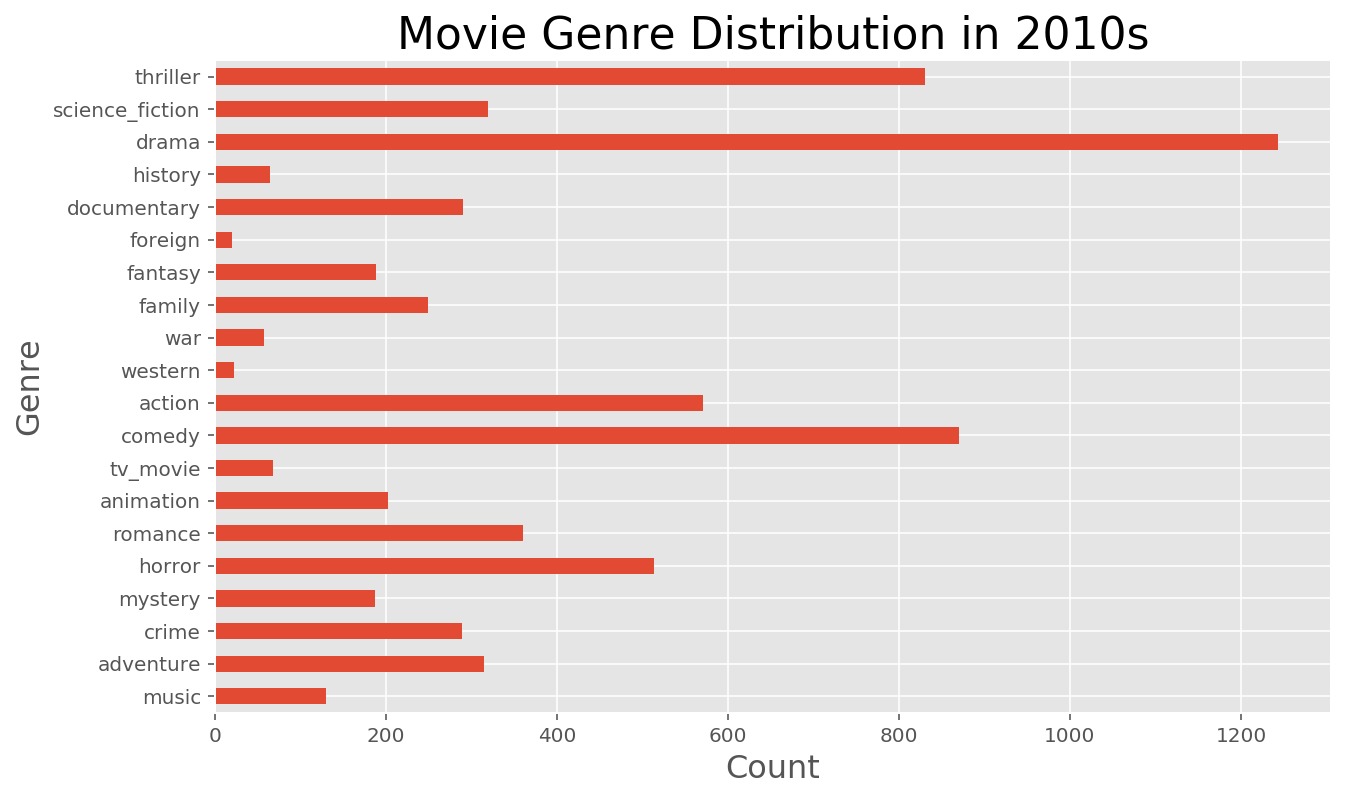

In [26]:
# Categories of genre to be counted
genres = ['music', 'adventure', 'crime', 'mystery', 'horror', 
          'romance', 'animation', 'tv_movie', 'comedy', 'action', 
          'western', 'war', 'family', 'fantasy', 'foreign', 'documentary', 
          'history', 'drama', 'science_fiction', 'thriller']

decades = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

genres_by_decade = {}

for decade in decades:
    # Subset decade
    samples = movies.query(f'release_by_decade == "{decade}"')
    # Count categories of genre
    samples = samples.loc[:, genres].sum()
    # Store the counts in a dictionary
    genres_by_decade[decade] = samples
    # Plot the counts of categories of genre
    plt.figure(figsize=(10,6))
    samples.plot(kind='barh')
    plt.title(f'Movie Genre Distribution in {decade}', fontsize=22)
    plt.xlabel('Count', fontsize=16)
    plt.ylabel('Genre', fontsize=16)

In [27]:
# Print out counts of categoires of genres in each decade
for decade in genres_by_decade:
    print('Most popular genre in {}: {}\tcounts: {}\t Proportion: {:.2f}%'.\
          format(decade, 
                 genres_by_decade[decade].idxmax(), 
                 genres_by_decade[decade].max(),
                 genres_by_decade[decade].max() / genres_by_decade[decade].sum() * 100))

Most popular genre in 1960s: drama	counts: 187	 Proportion: 18.21%
Most popular genre in 1970s: drama	counts: 252	 Proportion: 18.04%
Most popular genre in 1980s: comedy	counts: 451	 Proportion: 15.36%
Most popular genre in 1990s: drama	counts: 903	 Proportion: 18.17%
Most popular genre in 2000s: drama	counts: 1724	 Proportion: 17.54%
Most popular genre in 2010s: drama	counts: 1243	 Proportion: 18.30%


### Research Question 2: What kinds of properties are associated with movies that have high revenues?

Some of the values in the revenue column is euqal to 0, that means those values are missing. Thus, before calcuating the third quartile of the revenue, samples whose revenue is greater than 0 is filtered out. A sample whose revenue is considered high if its revenue is greater than or equal to the third quartile of the revenue. Otherwise, it is consider low.

Mean of each attribute between the high revenue sector and the low one is compared. Plus, the correlation matrix is computed between each attribute for the whole dataset.

Scatter plots on varialbes whose correlation coefficient is greater than about 0.10 or less than about -0.10 with variable revenue are plotted.

In [28]:
# Calculate the third quartile of revenue
revenue_Q3 = movies.query('revenue > 0').revenue.quantile(0.75)
revenue_Q3

131648235.913638

In [29]:
# Subset samples with high revenue
revenue_high = movies.query('revenue >= {}'.format(revenue_Q3))
# Calculate mean of each attribute in the high revenue subset
revenue_high.mean()

runtime            1.164452e+02
release_year       1.999201e+03
popularity         2.032960e+00
rating             6.419868e+00
budget             7.746882e+07
revenue            3.525645e+08
fantasy            1.599340e-01
crime              1.525144e-01
mystery            8.079143e-02
science_fiction    1.747733e-01
family             1.830173e-01
war                4.369332e-02
foreign            0.000000e+00
thriller           2.951360e-01
horror             6.512778e-02
adventure          3.314097e-01
romance            1.607585e-01
documentary        8.244023e-04
drama              3.594394e-01
animation          1.038747e-01
action             3.866447e-01
tv_movie           0.000000e+00
history            3.215169e-02
comedy             3.569662e-01
music              3.544930e-02
western            1.566364e-02
dtype: float64

In [30]:
# Subset samples that are not high revenue
revenue_low = movies.query('revenue < {}'.format(revenue_Q3))
# Calculate mean of each attribute in the non-high revenue subset
revenue_low.mean()

runtime            1.003362e+02
release_year       2.001581e+03
popularity         4.729242e-01
rating             5.917904e+00
budget             1.004361e+07
revenue            1.354902e+07
fantasy            7.498183e-02
crime              1.214041e-01
mystery            7.394330e-02
science_fiction    1.056184e-01
family             1.047876e-01
war                2.253609e-02
foreign            1.952435e-02
thriller           2.647212e-01
horror             1.618029e-01
adventure          1.110188e-01
romance            1.575449e-01
documentary        5.389968e-02
drama              4.490601e-01
animation          5.950774e-02
action             1.988784e-01
tv_movie           1.734344e-02
history            3.063662e-02
comedy             3.489459e-01
music              3.790632e-02
western            1.516253e-02
dtype: float64

In [31]:
# Compare the mean of each attribute between high revenue subset and non-high one
revenue_high.mean() - revenue_low.mean()

runtime            1.610901e+01
release_year      -2.379903e+00
popularity         1.560036e+00
rating             5.019638e-01
budget             6.742521e+07
revenue            3.390155e+08
fantasy            8.495222e-02
crime              3.111034e-02
mystery            6.848130e-03
science_fiction    6.915485e-02
family             7.822969e-02
war                2.115723e-02
foreign           -1.952435e-02
thriller           3.041487e-02
horror            -9.667510e-02
adventure          2.203909e-01
romance            3.213534e-03
documentary       -5.307528e-02
drama             -8.962072e-02
animation          4.436695e-02
action             1.877663e-01
tv_movie          -1.734344e-02
history            1.515071e-03
comedy             8.020307e-03
music             -2.457025e-03
western            5.011140e-04
dtype: float64

In [32]:
# Pint out the correlation matrix in high revenue subset
revenue_high.corr()

,runtime,release_year,popularity,rating,budget,revenue,fantasy,crime,mystery,science_fiction,...,romance,documentary,drama,animation,action,tv_movie,history,comedy,music,western
runtime,1.000000,-0.090720,0.147505,0.342288,0.199023,0.181557,-0.033550,0.055804,0.050342,0.037546,...,0.017587,0.005730,0.294432,-0.303451,0.140755,NaN,0.237593,-0.339366,-0.011070,0.067368
release_year,-0.090720,1.000000,0.294563,-0.160203,0.382628,-0.047415,0.147978,-0.056094,0.012554,0.088618,...,-0.058825,0.010940,-0.171638,0.153050,0.030051,NaN,-0.094156,0.028802,-0.078784,-0.048912
popularity,0.147505,0.294563,1.000000,0.341842,0.314806,0.440710,0.098769,-0.062478,-0.016724,0.248749,...,-0.117238,-0.016270,-0.120296,0.035445,0.151231,NaN,-0.048360,-0.149986,-0.064667,-0.004554
rating,0.342288,-0.160203,0.341842,1.000000,-0.060526,0.294836,-0.086915,0.077302,0.035311,-0.046448,...,-0.030342,0.007230,0.258181,0.047941,-0.106969,NaN,0.111837,-0.196936,-0.000338,0.041958
budget,0.199023,0.382628,0.314806,-0.060526,1.000000,0.379563,0.293148,-0.071625,-0.031476,0.250128,...,-0.189633,-0.036041,-0.225658,0.154461,0.326774,NaN,0.025437,-0.207306,-0.104363,-0.011875
revenue,0.181557,-0.047415,0.440710,0.294836,0.379563,1.000000,0.168757,-0.092199,-0.053083,0.135105,...,-0.070939,-0.021964,-0.124191,0.104659,0.123097,NaN,-0.045419,-0.136486,-0.012871,-0.021116
fantasy,-0.033550,0.147978,0.098769,-0.086915,0.293148,0.168757,1.000000,-0.135051,-0.063331,-0.005366,...,-0.019516,-0.012533,-0.172169,0.116830,-0.013897,NaN,-0.079527,0.026986,0.001494,-0.055041
crime,0.055804,-0.056094,-0.062478,0.077302,-0.071625,-0.092199,-0.135051,1.000000,0.093010,-0.140885,...,-0.135723,-0.012185,0.074090,-0.136915,0.124644,NaN,-0.012324,-0.052833,-0.044124,-0.016579
mystery,0.050342,0.012554,-0.016724,0.035311,-0.031476,-0.053083,-0.063331,0.093010,1.000000,0.030845,...,-0.080337,-0.008516,0.093150,-0.091021,-0.067657,NaN,-0.036886,-0.189317,-0.056835,-0.013035
science_fiction,0.037546,0.088618,0.248749,-0.046448,0.250128,0.135105,-0.005366,-0.140885,0.030845,1.000000,...,-0.154136,-0.013219,-0.204490,-0.106878,0.338919,NaN,-0.083878,-0.211488,-0.076486,-0.040571


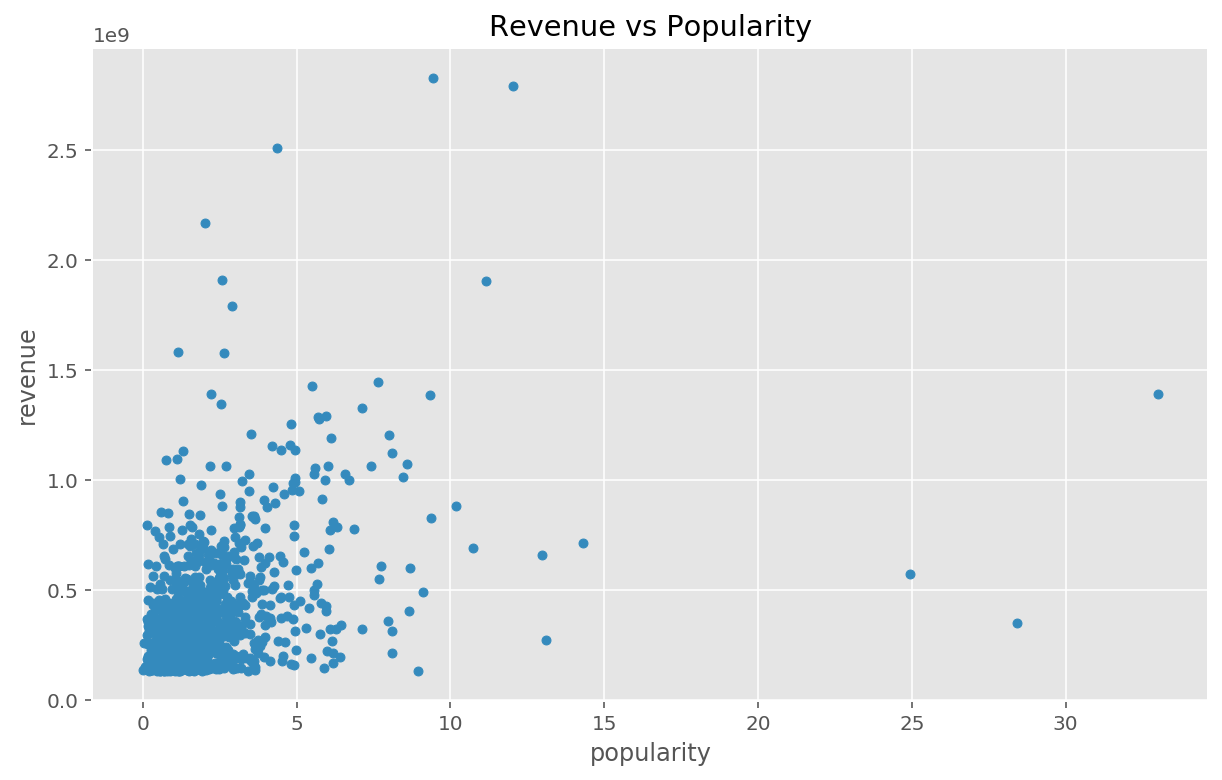

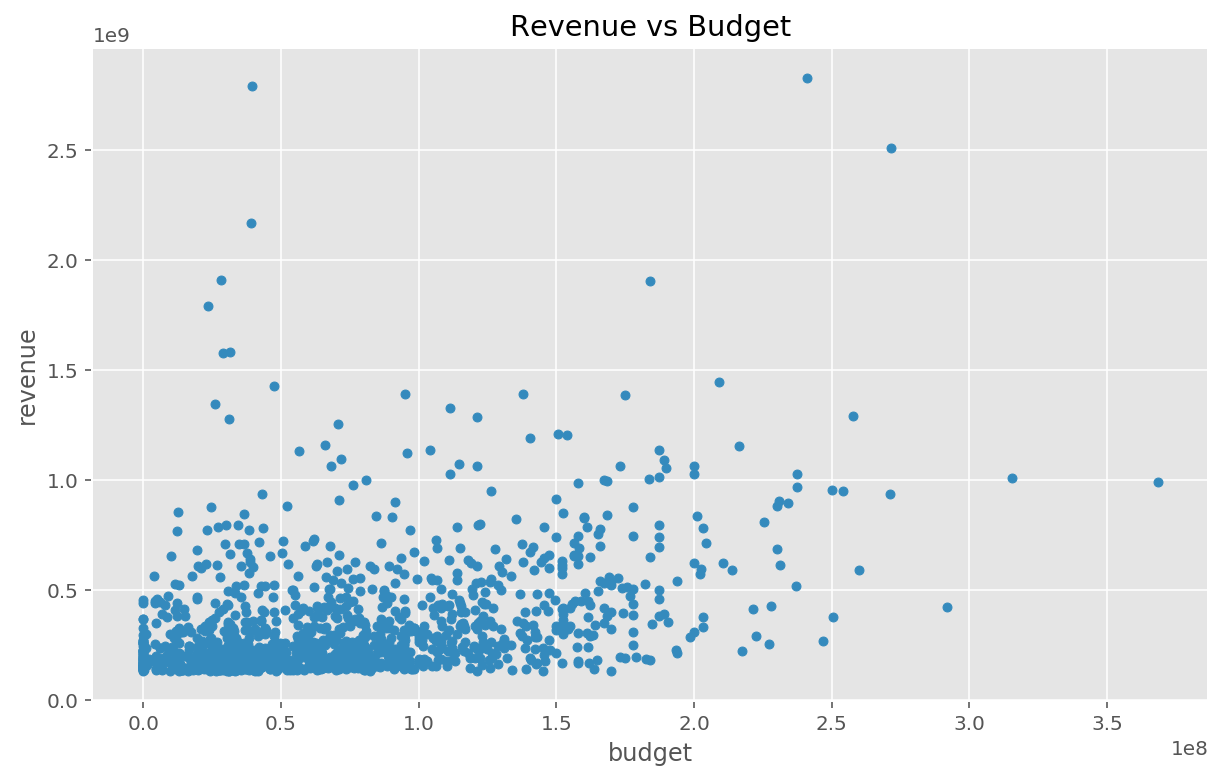

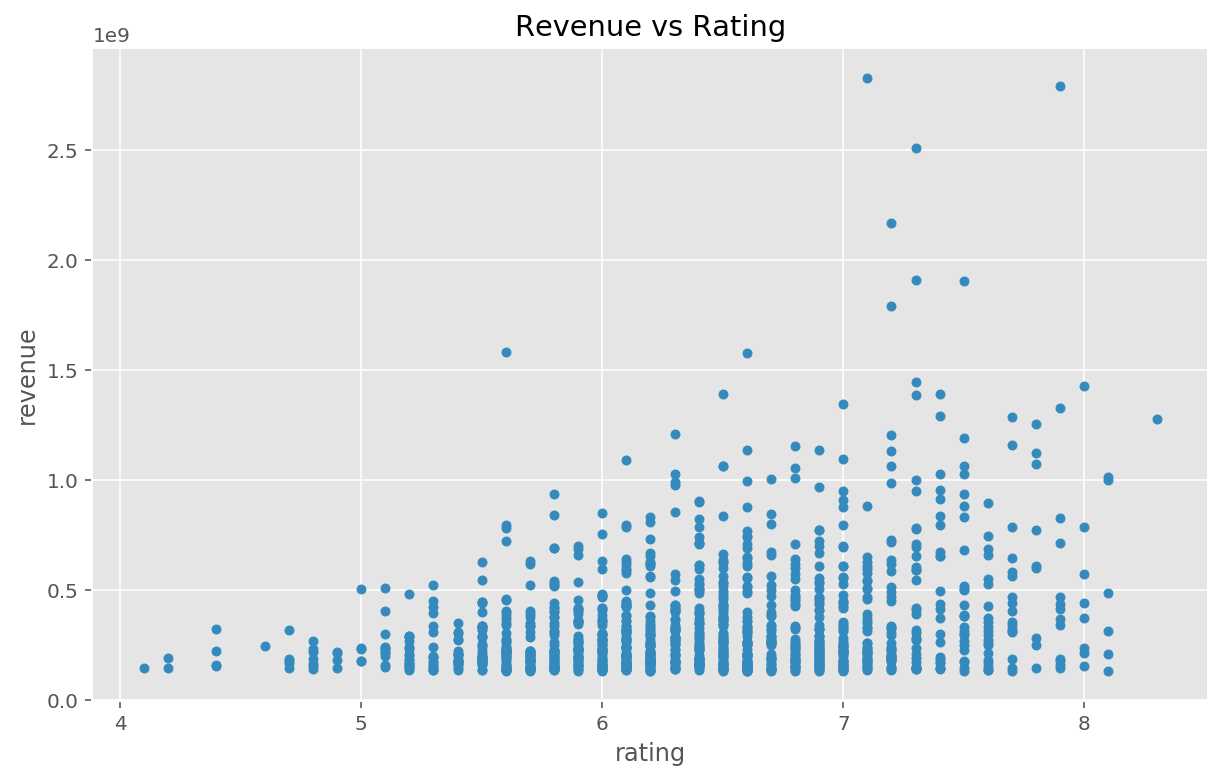

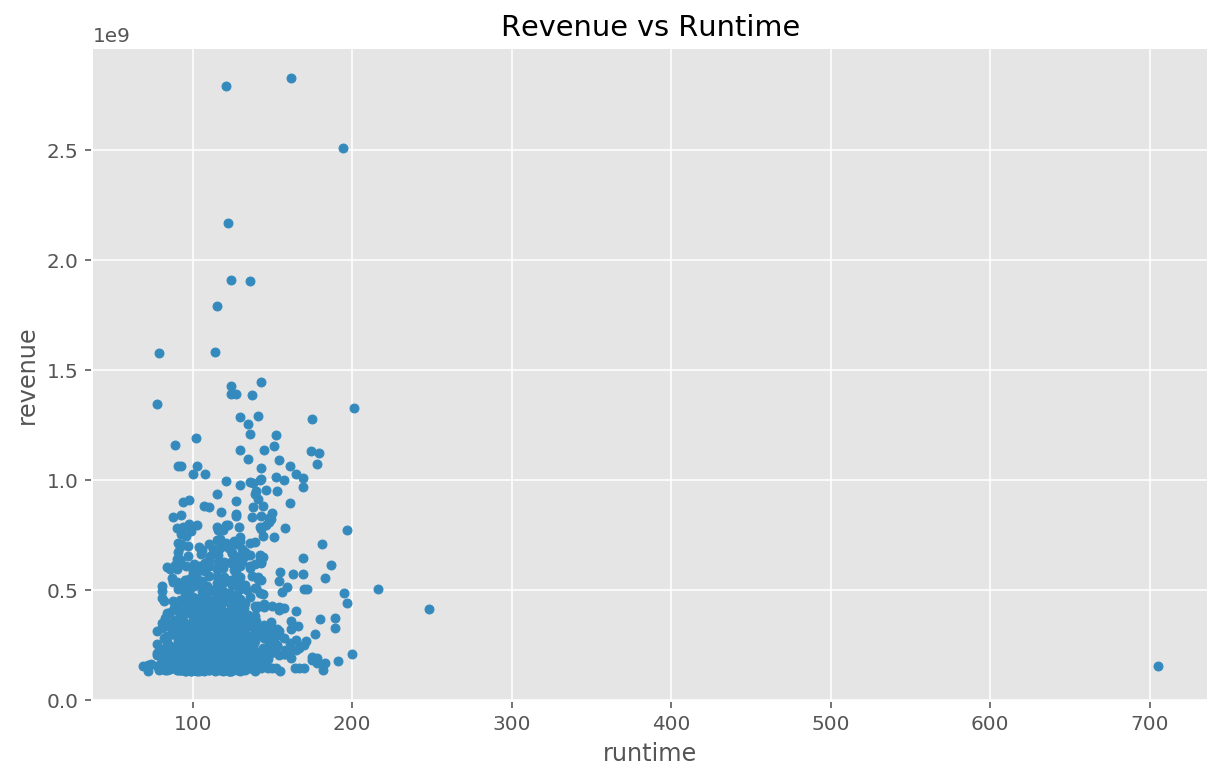

In [33]:
# Plot the correlation between numerical variables and revenue
revenue_corr_numeric = ['popularity', 'budget', 'rating', 'runtime', ]
for corr in revenue_corr_numeric:
    revenue_high.plot(x=corr, 
                      y='revenue', 
                      kind='scatter', 
                      title=f'Revenue vs {corr.title()}', 
                      figsize=(10, 6));

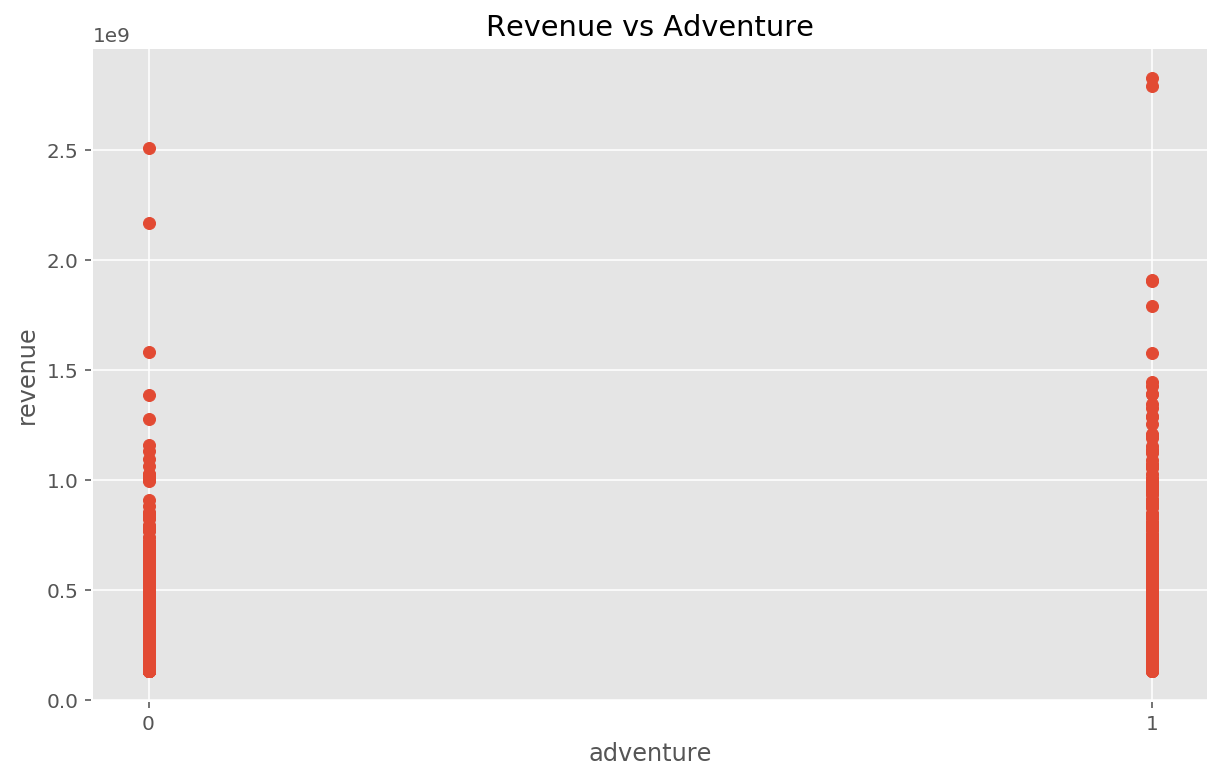

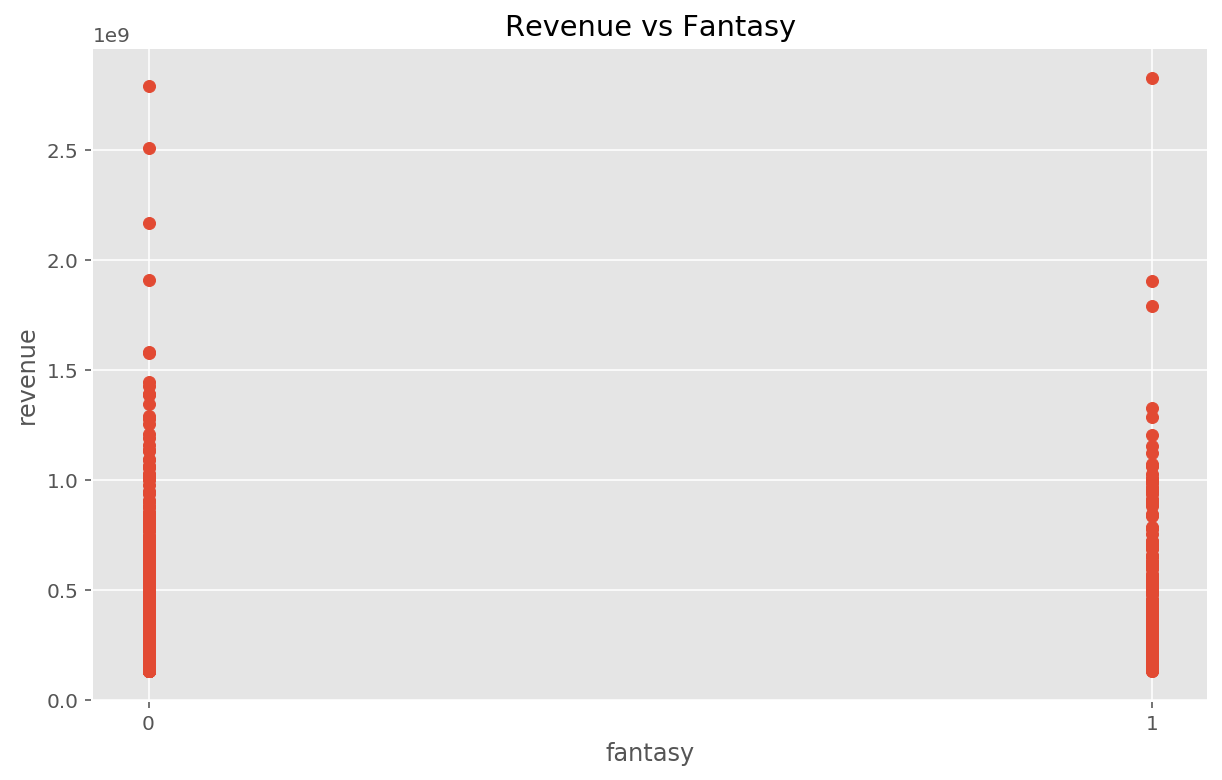

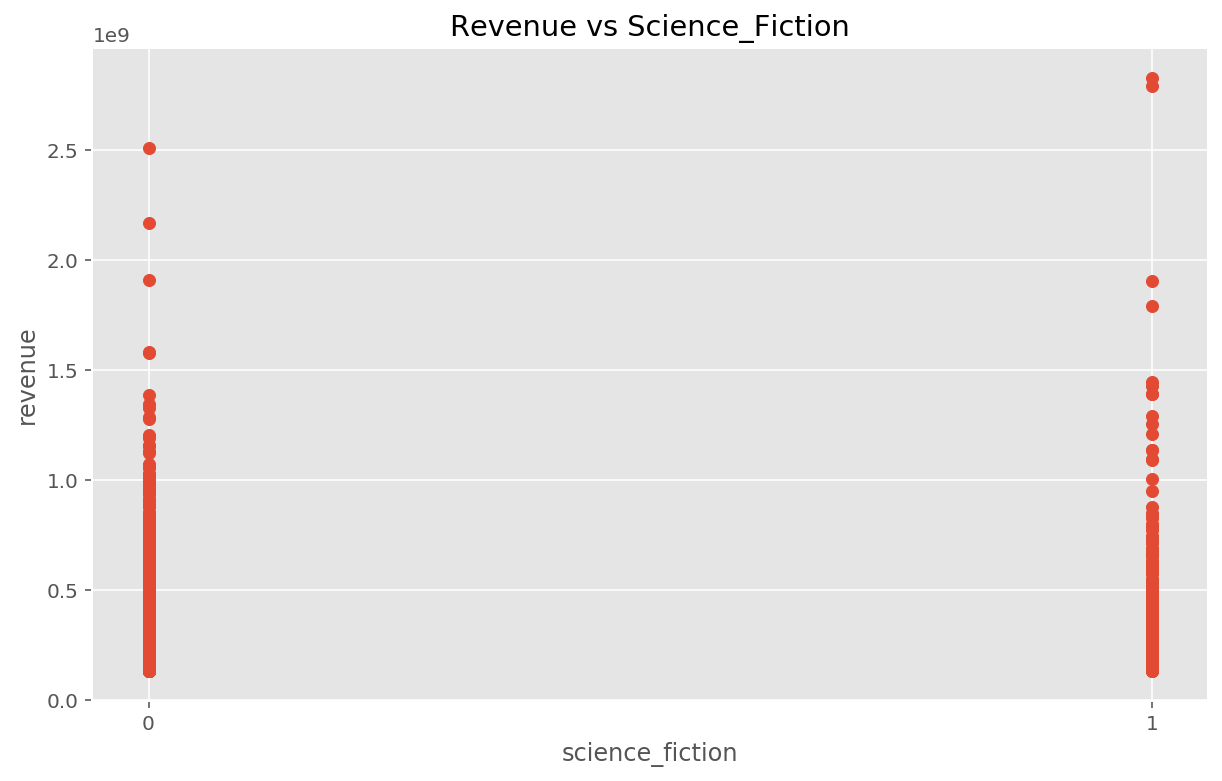

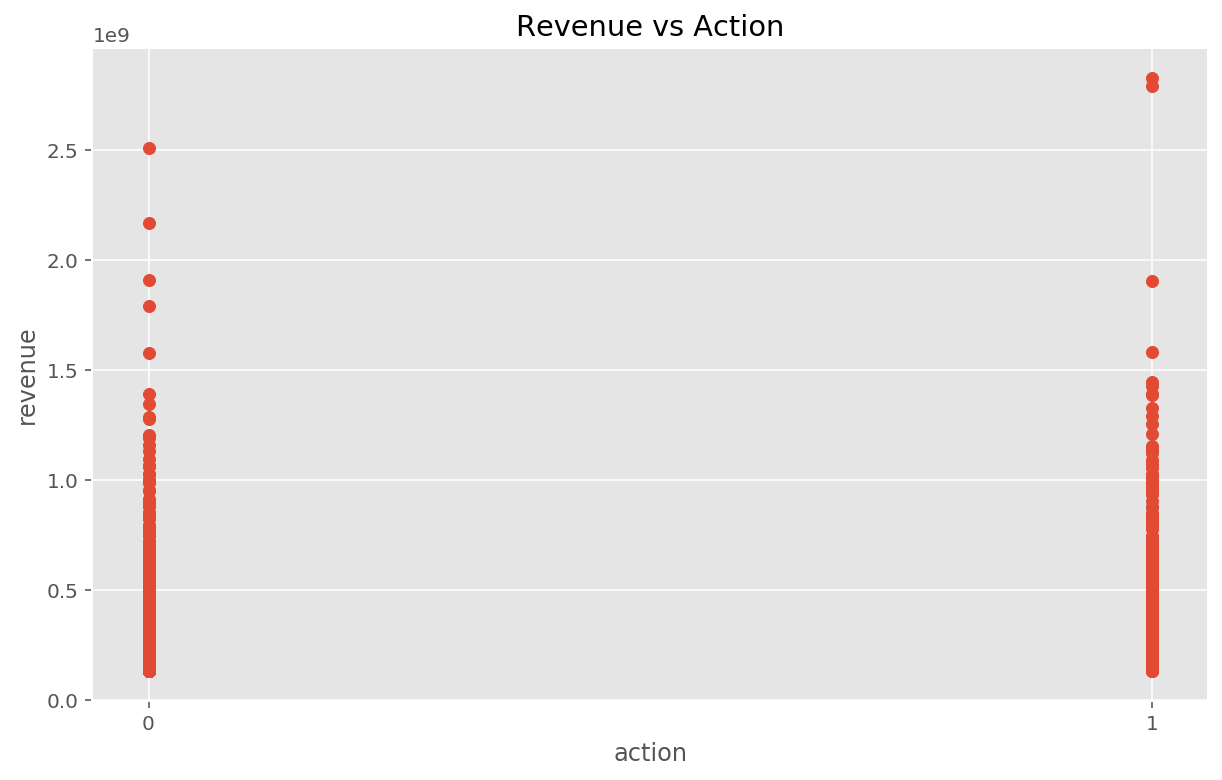

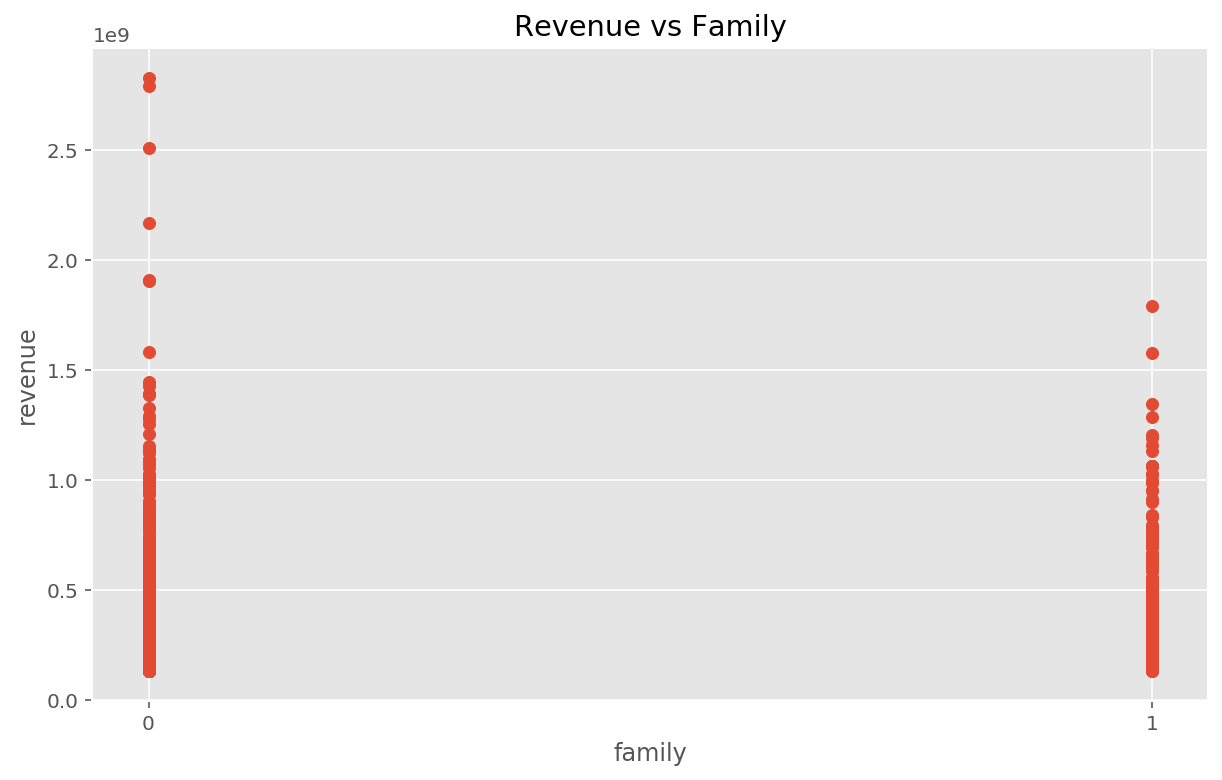

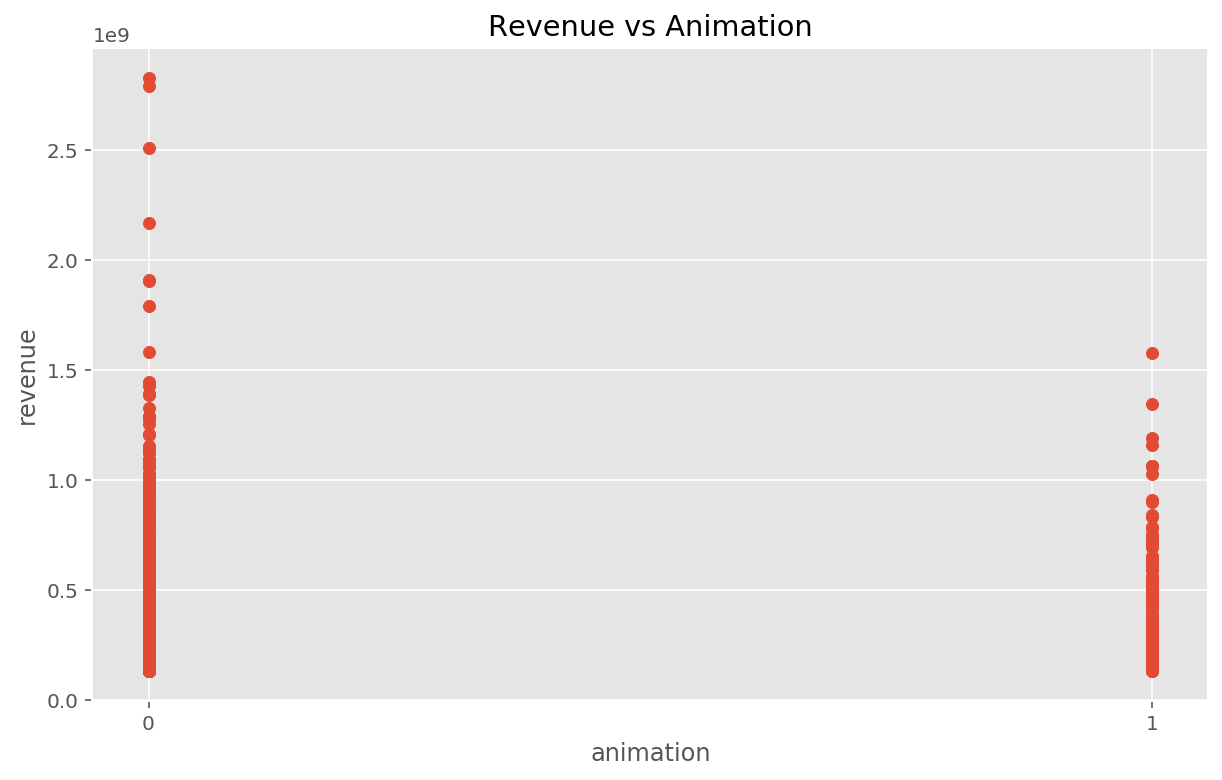

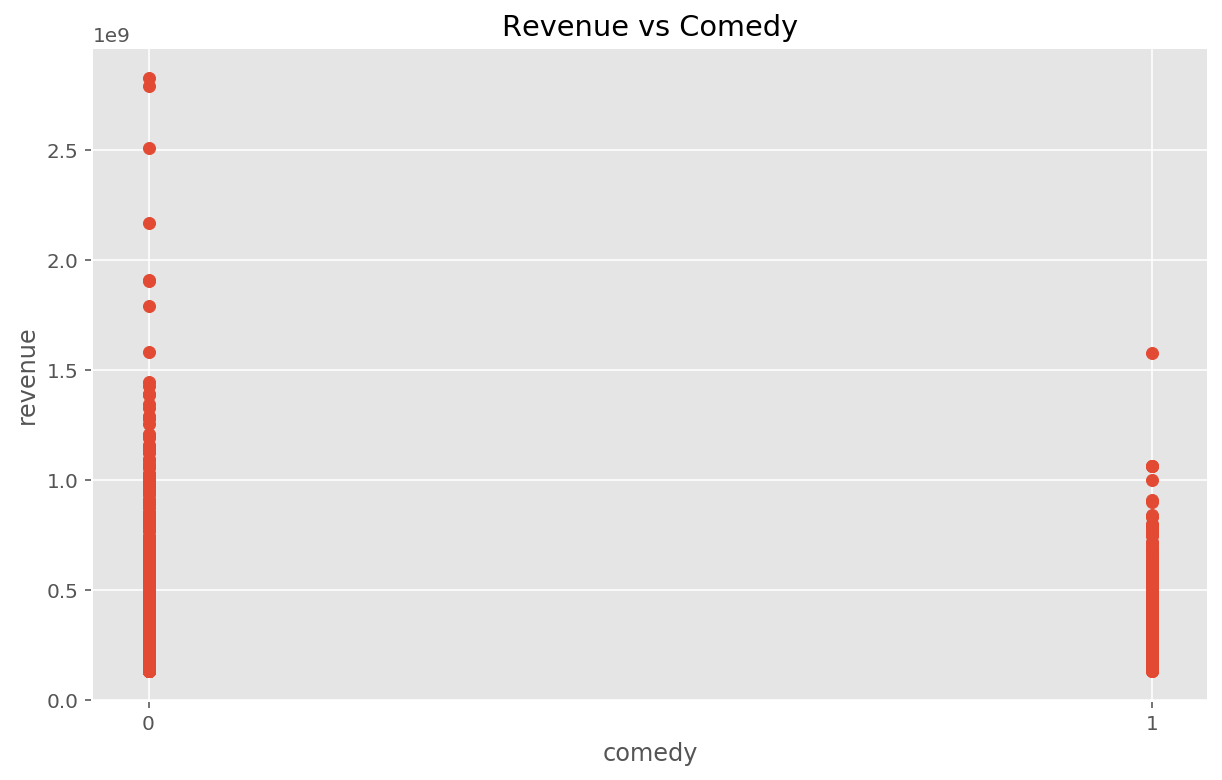

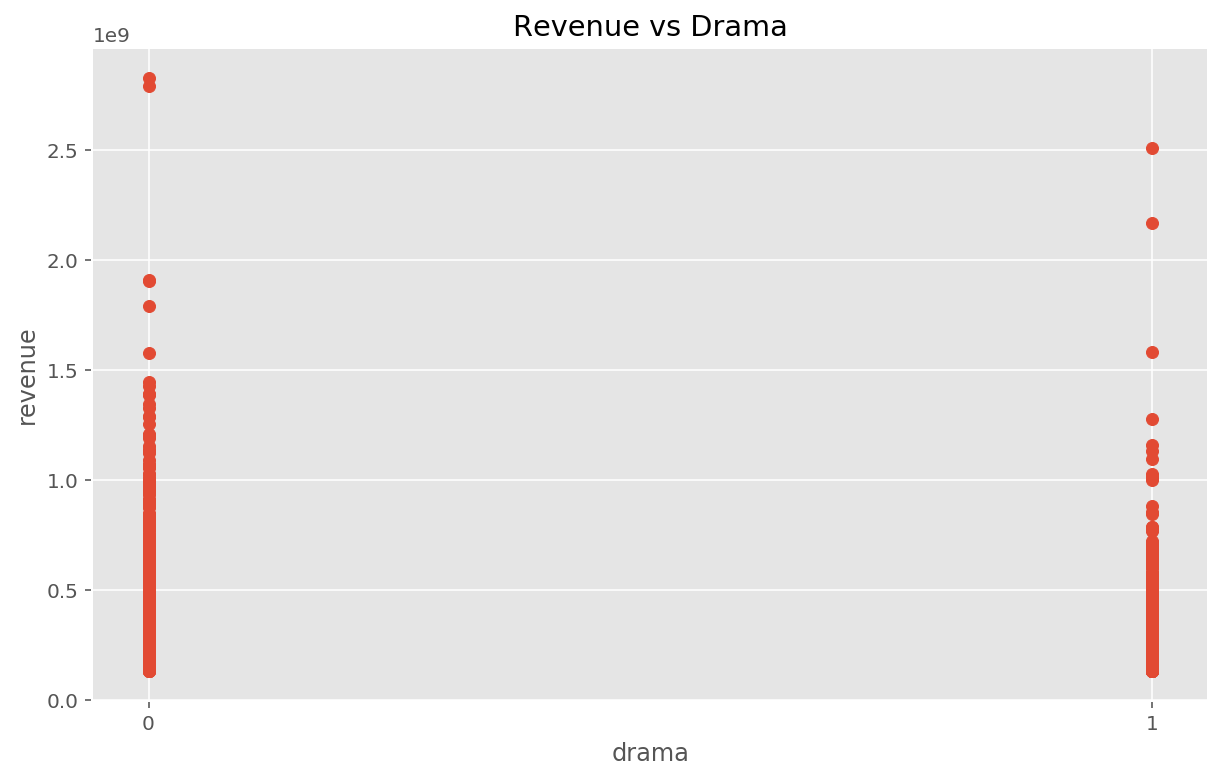

In [34]:
# Plot the correlation between categorical variables and revenue
revenue_corr_genre = ['adventure', 'fantasy', 'science_fiction', 
                         'action', 'family','animation', 'comedy', 'drama']
for corr in revenue_corr_genre:
    plt.figure(figsize=(10, 6))
    plt.scatter(revenue_high[corr], revenue_high['revenue'])
    plt.title(f'Revenue vs {corr.title()}')
    plt.xlabel(corr)
    plt.ylabel('revenue')
    plt.xticks([0, 1])

### Research Question 3: What kinds of properties are associated with movies that have high ratings?

Since there is no missing values in the rating column, the third quartile of rating is computed directly. A value of rating that is greater than or equal to the third quartile is considered high.

Mean of each attribute between samples with high ratings and low one is compared.

Scatter plots on varialbes whose correlation coefficient is greater than about 0.10 or less than about -0.10 with variable rating are plotted.

In [35]:
# Calculate the third quartile of rating 
rating_Q3 = movies.rating.quantile(0.75)
rating_Q3

6.6

In [36]:
# Subset samples with high rating
rating_high = movies.query('rating >= {}'.format(rating_Q3))
# Calculate mean of each attribute in the high rating subset
rating_high.mean()

runtime            1.076714e+02
release_year       1.999780e+03
popularity         9.082124e-01
rating             7.053609e+00
budget             1.948114e+07
revenue            8.623197e+07
fantasy            6.948640e-02
crime              1.322591e-01
mystery            6.277274e-02
science_fiction    8.190668e-02
family             1.090970e-01
war                3.726083e-02
foreign            1.879825e-02
thriller           1.718698e-01
horror             5.001678e-02
adventure          1.295737e-01
romance            1.456865e-01
documentary        1.228600e-01
drama              5.287009e-01
animation          1.017120e-01
action             1.607922e-01
tv_movie           1.141323e-02
history            4.968110e-02
comedy             2.789527e-01
music              6.411547e-02
western            1.711984e-02
dtype: float64

In [37]:
# Subset samples that are not with high rating
rating_low = movies.query('rating < {}'.format(rating_Q3))
# Calculate mean of each attribute in non-high rating subset
rating_low.mean()

runtime            1.000422e+02
release_year       2.001896e+03
popularity         5.486714e-01
rating             5.565064e+00
budget             1.686955e+07
revenue            3.831097e+07
fantasy            9.016915e-02
crime              1.220908e-01
mystery            7.923185e-02
science_fiction    1.252703e-01
family             1.152232e-01
war                2.022129e-02
foreign            1.678749e-02
thriller           3.045911e-01
horror             1.892407e-01
adventure          1.379880e-01
romance            1.625334e-01
documentary        1.958540e-02
drama              4.050617e-01
animation          5.036246e-02
action             2.422739e-01
tv_movie           1.691466e-02
history            2.365509e-02
comedy             3.767010e-01
music              2.759761e-02
western            1.449828e-02
dtype: float64

In [38]:
# Compare the mean of each attribute between the high rating subset and non-high one
rating_high.mean() - rating_low.mean()

runtime            7.629143e+00
release_year      -2.116095e+00
popularity         3.595410e-01
rating             1.488544e+00
budget             2.611595e+06
revenue            4.792100e+07
fantasy           -2.068274e-02
crime              1.016834e-02
mystery           -1.645910e-02
science_fiction   -4.336357e-02
family            -6.126185e-03
war                1.703954e-02
foreign            2.010769e-03
thriller          -1.327214e-01
horror            -1.392240e-01
adventure         -8.414363e-03
romance           -1.684691e-02
documentary        1.032746e-01
drama              1.236392e-01
animation          5.134953e-02
action            -8.148173e-02
tv_movie          -5.501438e-03
history            2.602601e-02
comedy            -9.774834e-02
music              3.651787e-02
western            2.621556e-03
dtype: float64

In [39]:
# Pint out the correlation matrix in high rating subset
rating_high.corr()

,runtime,release_year,popularity,rating,budget,revenue,fantasy,crime,mystery,science_fiction,...,romance,documentary,drama,animation,action,tv_movie,history,comedy,music,western
runtime,1.000000,-0.083199,0.131323,0.050143,0.210461,0.153357,-0.024583,0.057146,0.055272,-0.043542,...,0.052545,-0.000859,0.216746,-0.330731,0.042097,-0.053761,0.168388,-0.158981,-0.001918,0.046152
release_year,-0.083199,1.000000,0.086250,0.090059,0.032996,-0.079878,0.001900,-0.119210,-0.092738,0.024624,...,-0.002175,0.220620,-0.047319,0.086554,-0.065903,0.038250,-0.040922,-0.032528,0.010866,-0.148873
popularity,0.131323,0.086250,1.000000,0.169822,0.596614,0.621131,0.151129,0.043078,0.040428,0.231754,...,-0.021698,-0.183484,-0.037848,0.025209,0.216574,-0.050832,-0.026533,-0.066155,-0.065687,0.002178
rating,0.050143,0.090059,0.169822,1.000000,-0.004183,0.090398,-0.004034,-0.022318,-0.047435,0.003499,...,-0.104378,0.228646,-0.083328,0.035035,-0.062011,0.016761,-0.019856,-0.092011,0.098527,-0.015421
budget,0.210461,0.032996,0.596614,-0.004183,1.000000,0.691021,0.236998,0.031905,0.037923,0.186502,...,-0.029256,-0.186579,-0.046122,0.068701,0.259564,-0.055216,0.048544,-0.085063,-0.070970,0.008551
revenue,0.153357,-0.079878,0.621131,0.090398,0.691021,1.000000,0.187460,0.005934,0.006102,0.185287,...,-0.022179,-0.145405,-0.087429,0.040234,0.220532,-0.042671,-0.010329,-0.051340,-0.046866,0.003620
fantasy,-0.024583,0.001900,0.151129,-0.004034,0.236998,0.187460,1.000000,-0.094995,-0.005410,0.077244,...,-0.015556,-0.102273,-0.136043,0.218133,0.049292,-0.004506,-0.062481,0.036078,-0.023022,-0.025888
crime,0.057146,-0.119210,0.043078,-0.022318,0.031905,0.005934,-0.094995,1.000000,0.160416,-0.098542,...,-0.105046,-0.115929,0.132386,-0.118257,0.136620,-0.041948,-0.043662,-0.070496,-0.077915,-0.005693
mystery,0.055272,-0.092738,0.040428,-0.047435,0.037923,0.006102,-0.005410,0.160416,1.000000,0.023637,...,-0.055875,-0.088426,0.036411,-0.073349,-0.019094,-0.027807,-0.040065,-0.099254,-0.050789,-0.002149
science_fiction,-0.043542,0.024624,0.231754,0.003499,0.186502,0.185287,0.077244,-0.098542,0.023637,1.000000,...,-0.057417,-0.108057,-0.176573,0.065535,0.229159,0.014004,-0.068293,-0.065683,-0.063187,-0.039420


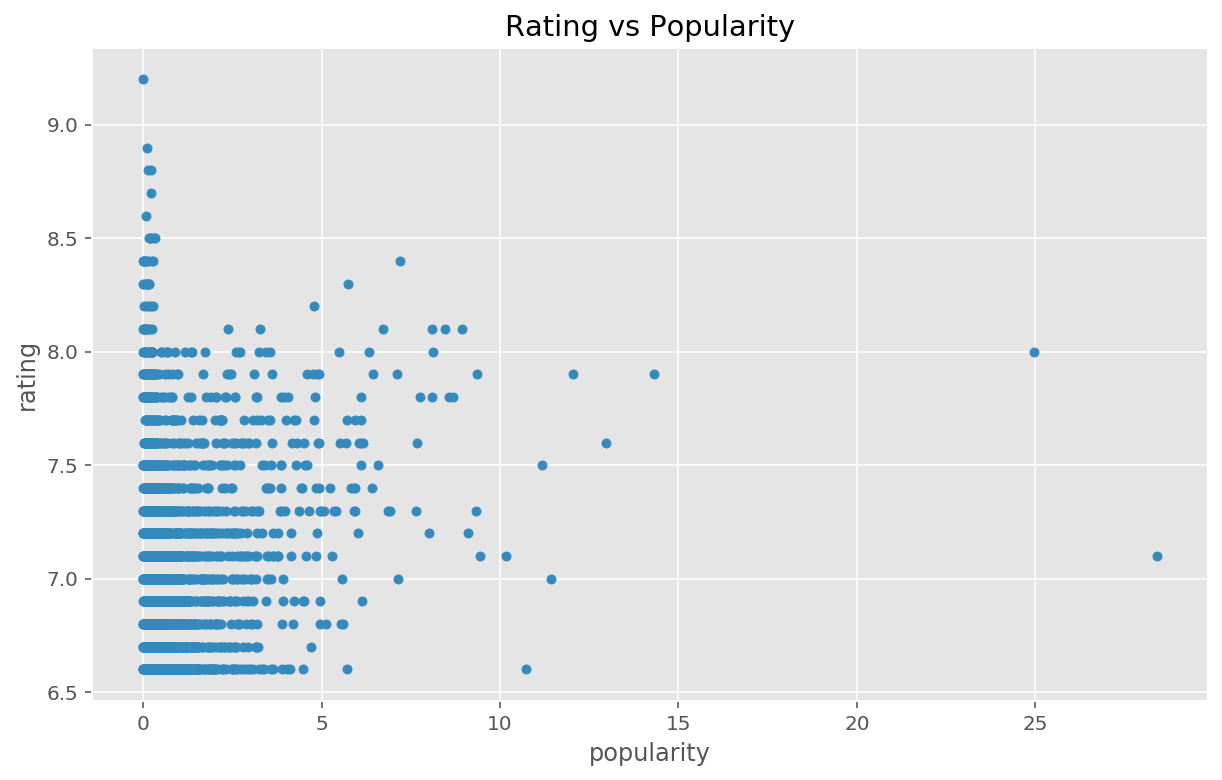

In [40]:
# Plot the correlation between popularity and rating
rating_high.plot(x='popularity', 
                 y='rating', 
                 kind='scatter', 
                 title='Rating vs Popularity', 
                 figsize=(10, 6));

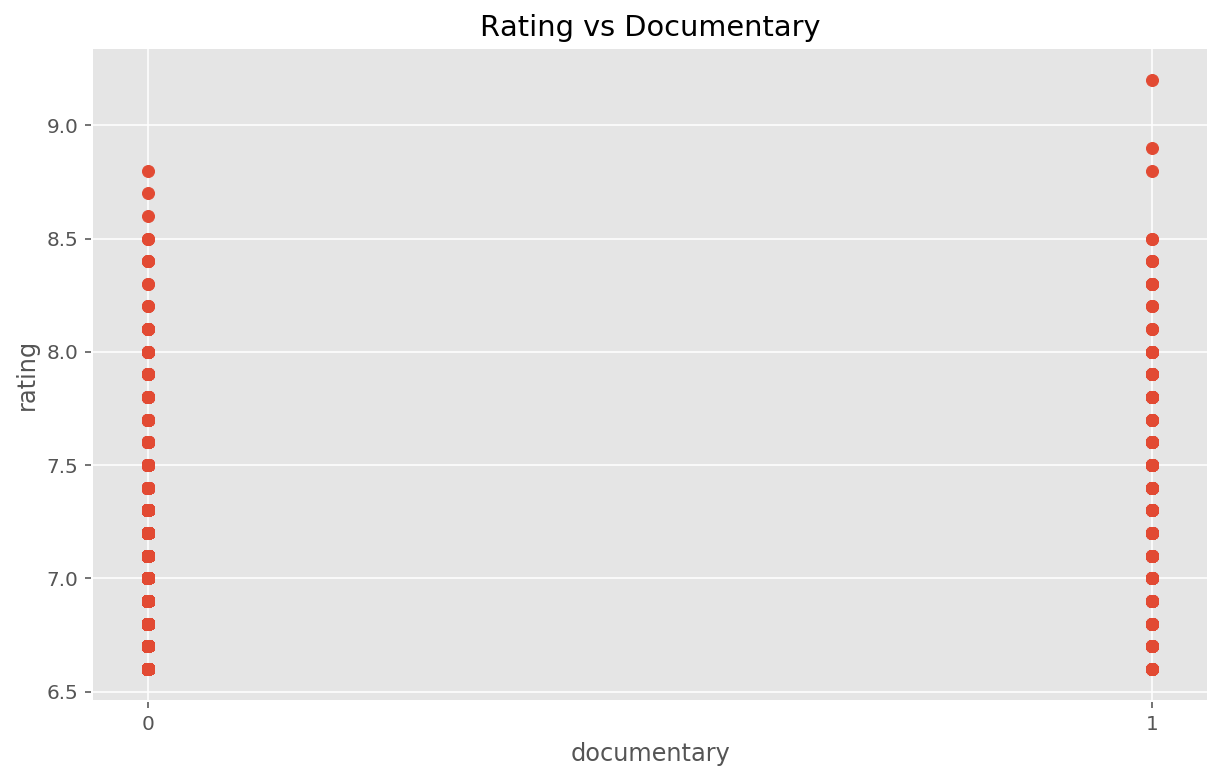

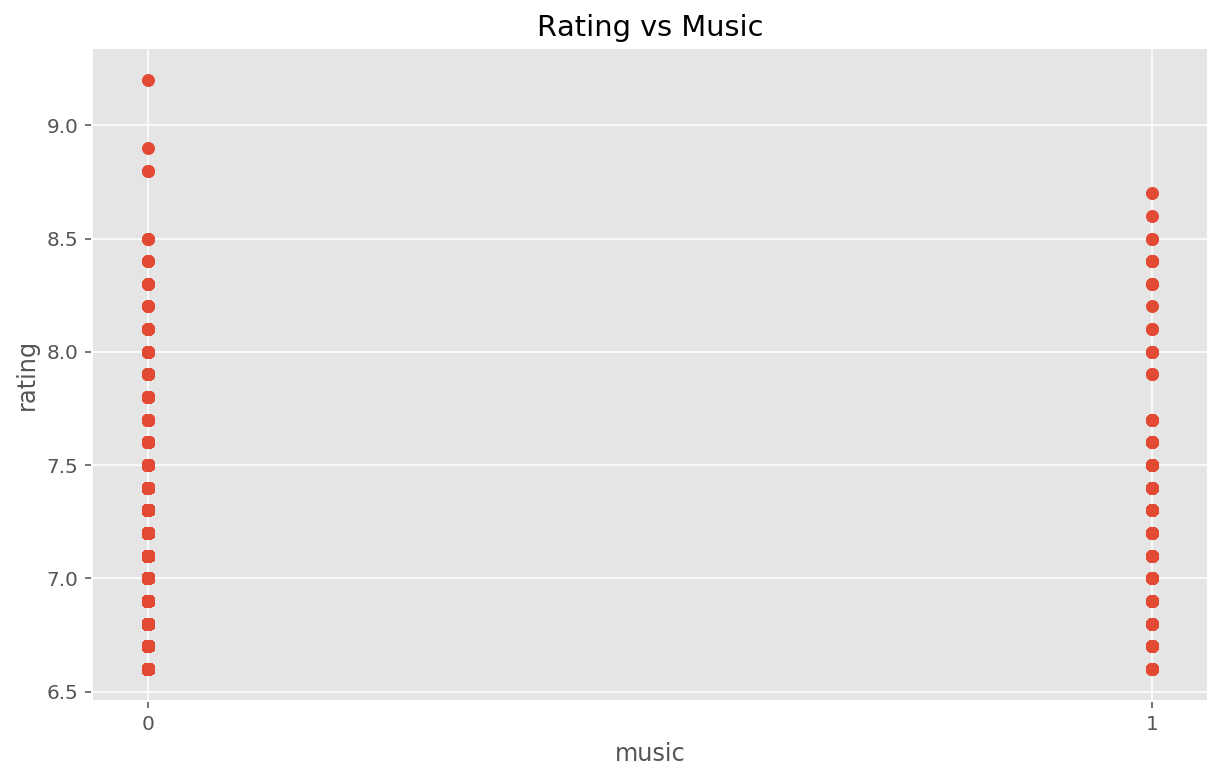

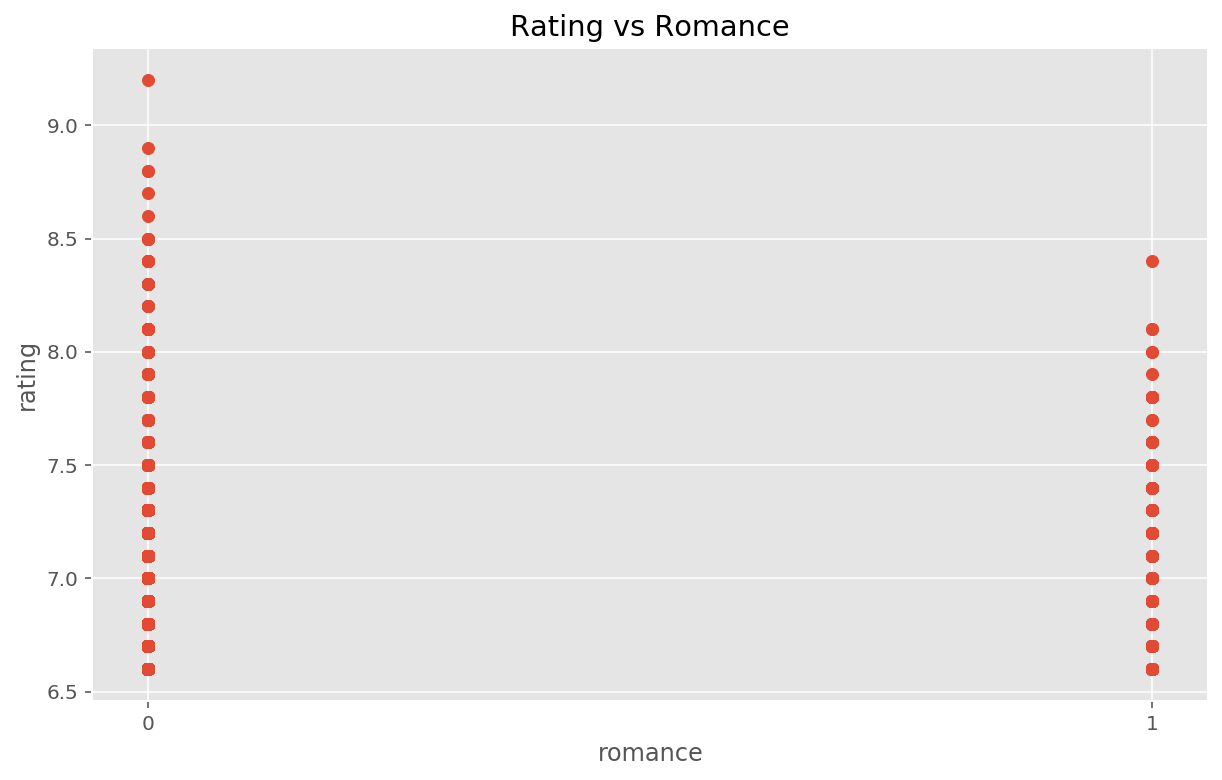

In [41]:
# Plot the correlation between categorical variables and rating
rating_corr_genre = ['documentary', 'music', 'romance']
for corr in rating_corr_genre:
    plt.figure(figsize=(10, 6))
    plt.scatter(rating_high[corr], rating_high['rating'])
    plt.title(f'Rating vs {corr.title()}')
    plt.xlabel(corr)
    plt.ylabel('rating')
    plt.xticks([0, 1])

<a id='conclusions'></a>
## Conclusions

### Research Question 1: Which genres are most popular from decade to decade?

Drama is the most popular genre from 1960s to 2010s except that comedy is the most popular one in 1980s.

### Research Question 2: What kinds of properties are associated with movies that have high revenues?

Movies that are of high revenues are weakly, positively correlated with popularity, budget, rating, runtime, genres of adventure, fantasy, science fiction, action, family, or animation. Yet, they are weakly, negatively correlated with genres of comedy or drama.

### Research Question 3: What kinds of properties are associated with movies that have high ratings?

Movies that are of high ratings are weekly, positively correlated with popularity and genres of documentary or music. Yet, they are weakly, negatively correlated with genre of romance.

### References

N/A